In [1]:
% matplotlib inline
from stratified_bayesian_blocks.stratified_bayesian_blocks import stratified_bayesian_blocks
import numpy as np
from matplotlib import pyplot as plt
from astroML.density_estimation import bayesian_blocks
from scipy.stats.kde import gaussian_kde as kde
import seaborn as sns
sns.set_style("whitegrid")

Normal-Exponential data

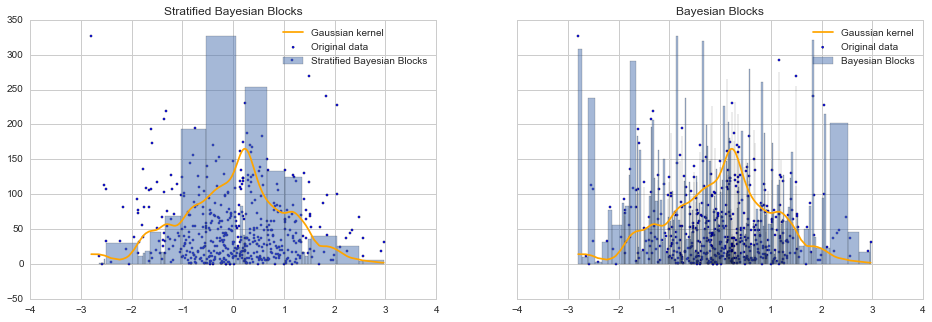

In [37]:
r = np.random.randn(500)
s = np.random.exponential(50, 500).astype(int)
x = np.repeat(r, s)

# Evaluate Stratified Bayesian Blocks, Bayesian Blocks, and a Gaussian Kernel on the data
sbb_bins = stratified_bayesian_blocks(x)
bb_bins = bayesian_blocks(x)
kernel = kde(x)
gaussian = kernel(np.sort(r))*np.max(s)

fig, ax = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Stratified Bayesian Blocks
sbb_counts, sbb_bins = np.histogram(x, sbb_bins)
sbb_heights = np.max(s)*sbb_counts / np.max(sbb_counts).astype(float)
sbb_lefts = sbb_bins[:-1]
sbb_widths = sbb_bins[1:] - sbb_bins[:-1]
ax[0].bar(sbb_lefts, sbb_heights, width = sbb_widths, alpha=0.5, label="Stratified Bayesian Blocks")
ax[0].scatter(r, s, label="Original data", marker=".")
ax[0].plot(np.sort(r), gaussian, label="Gaussian kernel", color="orange")
ax[0].legend()
ax[0].set_title("Stratified Bayesian Blocks")


# Regular Bayesian Blocks
bb_counts, bb_bins = np.histogram(x, bb_bins)
bb_heights = np.max(s)*bb_counts / np.max(bb_counts).astype(float)
bb_lefts = bb_bins[:-1]
bb_widths = bb_bins[1:] - bb_bins[:-1]
ax[1].bar(bb_lefts, bb_heights, width = bb_widths, alpha=0.5, label="Bayesian Blocks")
ax[1].scatter(r, s, label="Original data", marker=".")
ax[1].plot(np.sort(r), gaussian, label="Gaussian kernel", color="orange")
ax[1].legend()
ax[1].set_title("Bayesian Blocks")

Mixed Normal/categorical data

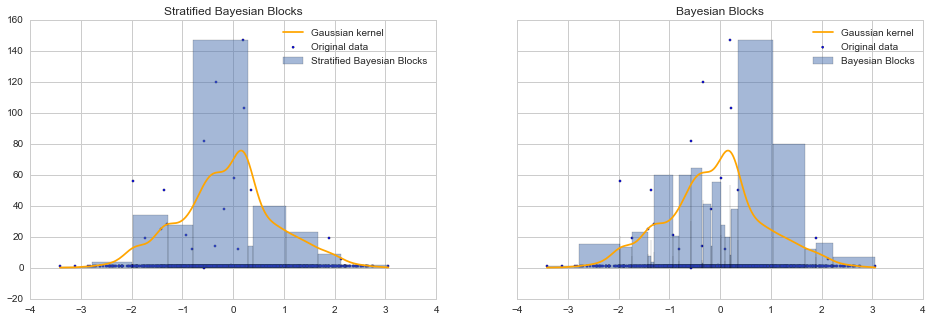

In [35]:
r = np.random.randn(2000)
s = np.ones(len(r)).astype(np.int)
sel = np.random.randint(0, len(r), (np.floor(len(r)*0.01)).astype(np.int))
reps = np.random.exponential(50, len(sel))
s[sel] = reps
x = np.repeat(r, s)

# Evaluate Stratified Bayesian Blocks, Bayesian Blocks, and a Gaussian Kernel on the data
sbb_bins = stratified_bayesian_blocks(x)
bb_bins = bayesian_blocks(x)
kernel = kde(x)
gaussian = kernel(np.sort(r))*np.max(s)

fig, ax = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Stratified Bayesian Blocks
sbb_counts, sbb_bins = np.histogram(x, sbb_bins)
sbb_heights = np.max(s)*sbb_counts / np.max(sbb_counts).astype(float)
sbb_lefts = sbb_bins[:-1]
sbb_widths = sbb_bins[1:] - sbb_bins[:-1]
ax[0].bar(sbb_lefts, sbb_heights, width = sbb_widths, alpha=0.5, label="Stratified Bayesian Blocks")
ax[0].scatter(r, s, label="Original data", marker=".")
ax[0].plot(np.sort(r), gaussian, label="Gaussian kernel", color="orange")
ax[0].legend()
ax[0].set_title("Stratified Bayesian Blocks")


# Regular Bayesian Blocks
bb_counts, bb_bins = np.histogram(x, bb_bins)
bb_heights = np.max(s)*bb_counts / np.max(bb_counts).astype(float)
bb_lefts = bb_bins[:-1]
bb_widths = bb_bins[1:] - bb_bins[:-1]
ax[1].bar(bb_lefts, bb_heights, width = bb_widths, alpha=0.5, label="Bayesian Blocks")
ax[1].scatter(r, s, label="Original data", marker=".")
ax[1].plot(np.sort(r), gaussian, label="Gaussian kernel", color="orange")
ax[1].legend()
ax[1].set_title("Bayesian Blocks")